In [1]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
import networkx as nx

In [2]:
dfz = pd.read_parquet('Carbon-tax-network-effects/dfz.parquet')
dfz_c= pd.read_parquet('Carbon-tax-network-effects/dfz_c.parquet')
# Create the directed, weighted graph for base scenario from DataFrame
G = nx.from_pandas_adjacency(dfz, create_using=nx.DiGraph)
G_c = nx.from_pandas_adjacency(dfz_c, create_using=nx.DiGraph)

dfz_b = pd.read_parquet('Carbon-tax-network-effects/dfz_bca.parquet')
dfz_b_c= pd.read_parquet('Carbon-tax-network-effects/dfz_bca_c.parquet')
# Create the directed, weighted graph for bca scenario from DataFrame
G_b = nx.from_pandas_adjacency(dfz_b, create_using=nx.DiGraph)
G_b_c = nx.from_pandas_adjacency(dfz_b_c, create_using=nx.DiGraph)

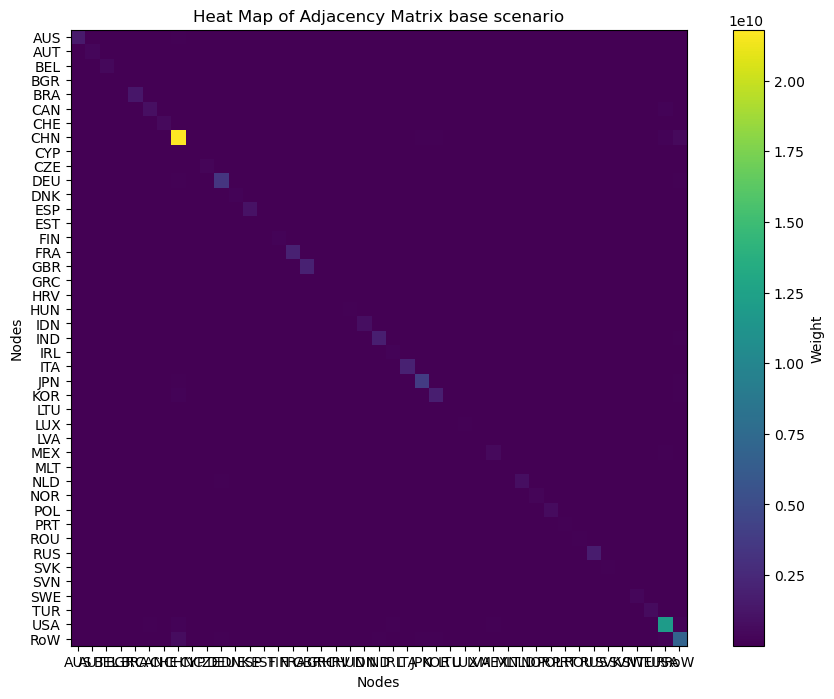

In [3]:
# Create a heat map of G_c
plt.figure(figsize=(12, 8))
plt.imshow(dfz_c, cmap='viridis', interpolation='none')
plt.colorbar(label='Weight')
plt.title('Heat Map of Adjacency Matrix base scenario')
plt.xlabel('Nodes')
plt.ylabel('Nodes')

# Add gridlines and node labels
plt.xticks(ticks=range(len(G_c.nodes)), labels=list(G_c.nodes))
plt.yticks(ticks=range(len(G_c.nodes)), labels=list(G_c.nodes))
#plt.grid(False)

plt.show()

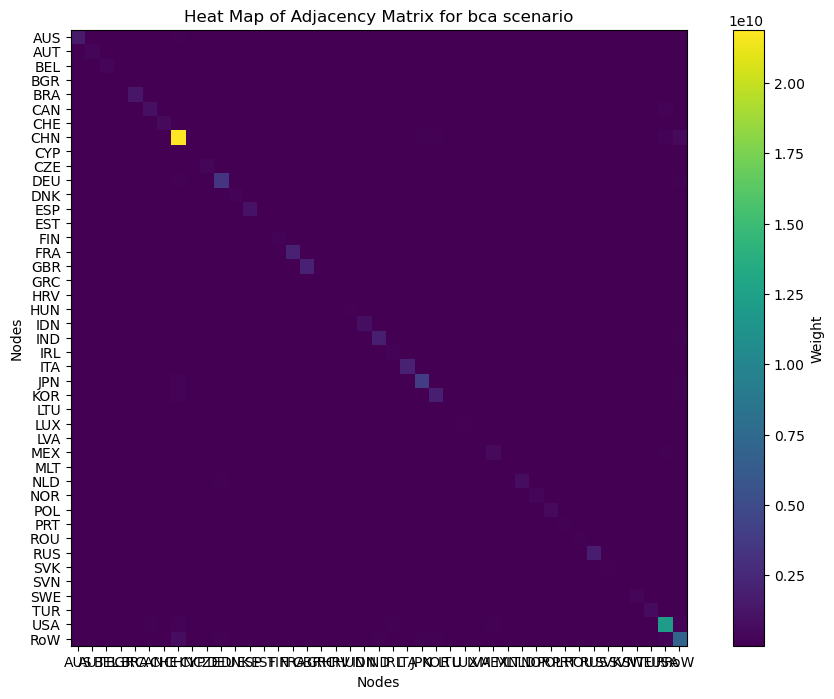

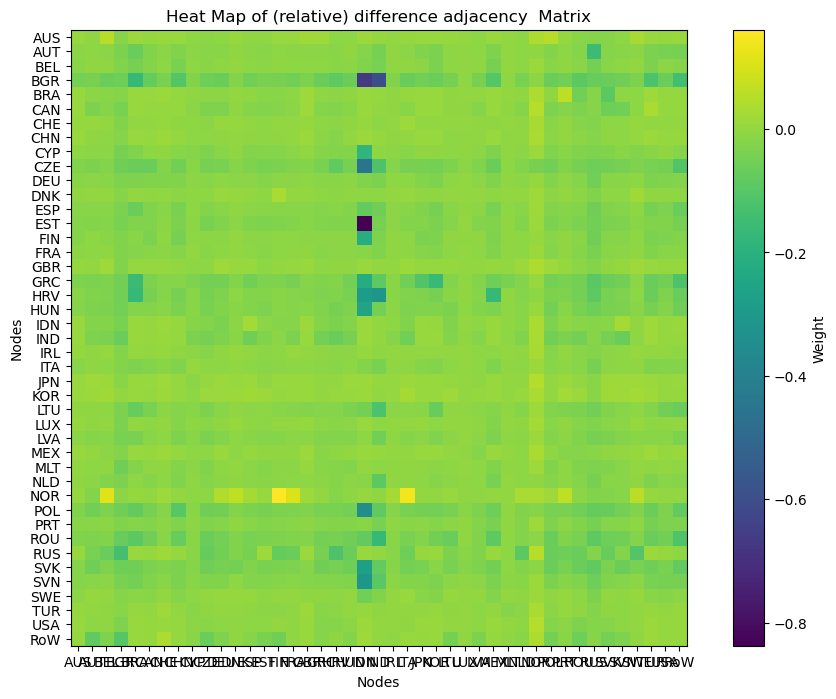

In [4]:
# Create a heat map of G_b_c
plt.figure(figsize=(12, 8))
plt.imshow(dfz_b_c, cmap='viridis', interpolation='none')
plt.colorbar(label='Weight')
plt.title('Heat Map of Adjacency Matrix for bca scenario')
plt.xlabel('Nodes')
plt.ylabel('Nodes')

# Add gridlines and node labels
plt.xticks(ticks=range(len(G_c.nodes)), labels=list(G_c.nodes))
plt.yticks(ticks=range(len(G_c.nodes)), labels=list(G_c.nodes))
#plt.grid(False)

plt.show()

#create an adjacency matrix equal to the relative difference of A_bca and A
df_dif_b = (dfz_b_c - dfz_c) / dfz_c
df_dif_b.head()

# Create a heat map
plt.figure(figsize=(12, 8))
plt.imshow(df_dif_b, cmap='viridis', interpolation='none')
plt.colorbar(label='Weight')
plt.title('Heat Map of (relative) difference adjacency  Matrix')
plt.xlabel('Nodes')
plt.ylabel('Nodes')

# Add gridlines and node labels
plt.xticks(ticks=range(len(G_c.nodes)), labels=list(G_c.nodes))
plt.yticks(ticks=range(len(G_c.nodes)), labels=list(G_c.nodes))
#plt.grid(False)

plt.show()

In [5]:
# Get in-degrees and out-degrees for each node
in_degrees = dict(G_b.in_degree())  # In-degree for each node
out_degrees = dict(G_b.out_degree())  # Out-degree for each node
# Convert the in-degrees and out-degrees to lists for easier computation
in_degree_values = list(in_degrees.values())
out_degree_values = list(out_degrees.values())

# Calculate mean and standard deviation for in-degree and out-degree
mean_in_degree = np.mean(in_degree_values)
std_in_degree = np.std(in_degree_values)

mean_out_degree = np.mean(out_degree_values)
std_out_degree = np.std(out_degree_values)

# Print the mean and standard deviation
print(f"In-Degree - Mean: {mean_in_degree}, Standard Deviation: {std_in_degree}")
print(f"Out-Degree - Mean: {mean_out_degree}, Standard Deviation: {std_out_degree}")

In-Degree - Mean: 1977.0, Standard Deviation: 0.0
Out-Degree - Mean: 1977.0, Standard Deviation: 0.0


In [6]:
#def a function to create cumulative dict for countries
def cum_count(D):
    cum_count_D = {}
    # Loop over each key in the original dictionary
    for key, value in D.items():
        # Extract the prefix (the part before the underscore)
        prefix = key.split('_')[0]
    
        # Sum the values for each prefix
        if prefix in cum_count_D:
            cum_count_D[prefix] += value
        else:
            cum_count_D[prefix] = value
    return cum_count_D

Weight - Mean: 21721.322115081948, Standard Deviation: 1350702.7661092028


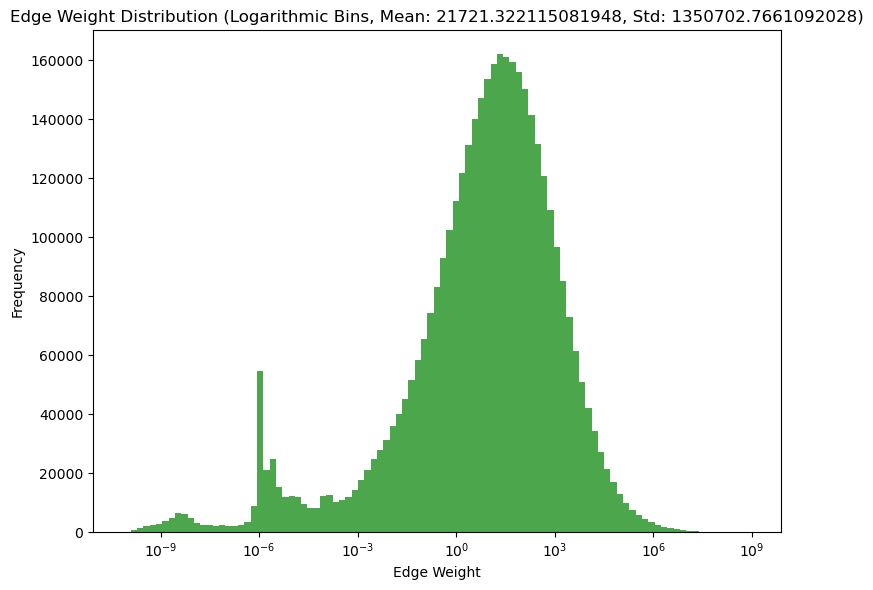

in_strength - Mean: 42943053.82151703, Standard Deviation: 140820612.04217377


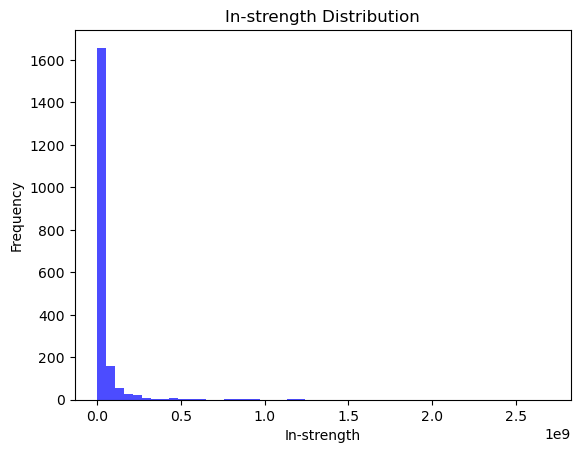

out_strength - Mean: 42943053.82151702, Standard Deviation: 144892037.35593778


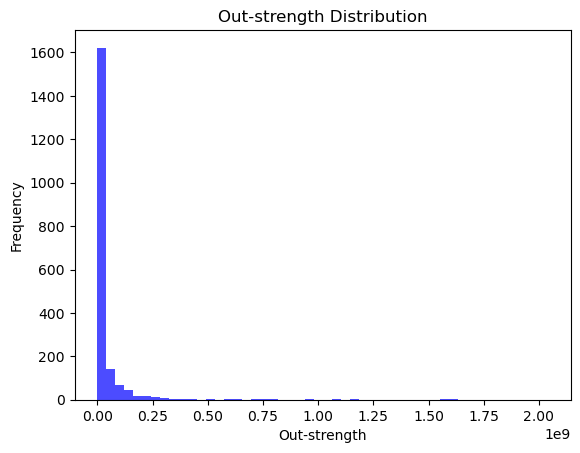

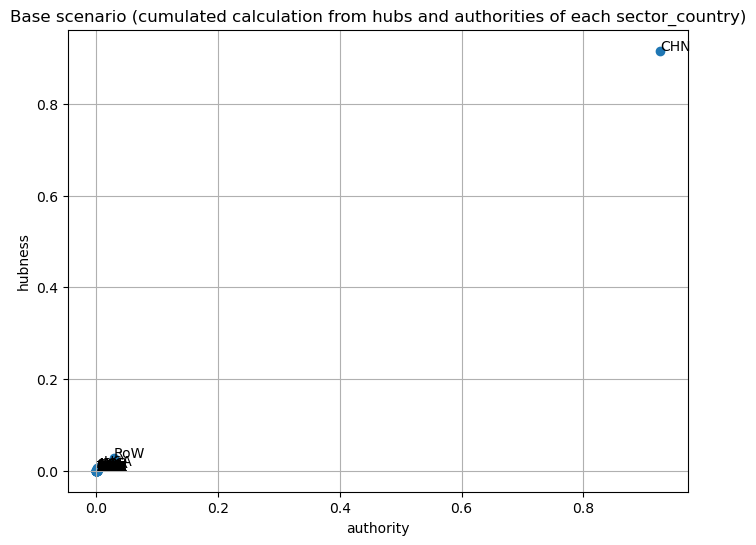

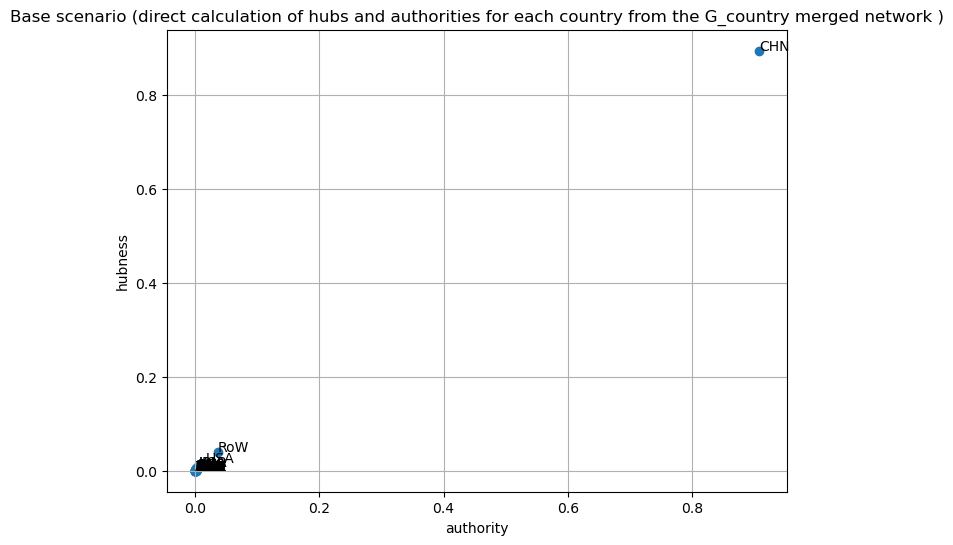

In [7]:
#centrality measures for Base

######## Weight ########
weights = dfz.values.flatten() # Flatten the matrix to extract the weights
mean_weight = np.mean(weights)
std_weight = np.std(weights)
print(f"Weight - Mean: {mean_weight}, Standard Deviation: {std_weight}")
# Plot with logarithmic bins
plt.figure(figsize=(8, 6))
plt.hist(weights, bins=np.logspace(np.log10(min(weights)), np.log10(max(weights)), 100), color='g', alpha=0.7)
plt.xscale('log')
plt.title(f'Edge Weight Distribution (Logarithmic Bins, Mean: {mean_weight}, Std: {std_weight})')
plt.xlabel('Edge Weight')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show() 

######## In and Out strenght ########
in_str = {node: sum(data['weight'] for _, _, data in G.in_edges(node, data=True)) for node in G.nodes}
plt.hist(in_str.values(), bins = 50, color='b', alpha=0.7)
plt.title('In-strength Distribution')
plt.xlabel('In-strength') 
plt.ylabel('Frequency') 
in_str_val = list(in_str.values())
mean_in_str = np.mean(in_str_val)
std_in_str = np.std(in_str_val)
print(f"in_strength - Mean: {mean_in_str}, Standard Deviation: {std_in_str}")
plt.show()

out_str = {node: sum(data['weight'] for _, _, data in G.out_edges(node, data=True)) for node in G.nodes}
plt.hist(out_str.values(), bins = 50, color='b', alpha=0.7)
plt.title('Out-strength Distribution')
plt.xlabel('Out-strength') 
plt.ylabel('Frequency') 
out_str_val = list(out_str.values())
mean_out_str = np.mean(out_str_val)
std_out_str = np.std(out_str_val)
print(f"out_strength - Mean: {mean_out_str}, Standard Deviation: {std_out_str}")

######## Hubs and authorities ########
### from G ###
hub_aut = nx.hits(G)
hub_c= cum_count(hub_aut[0])
aut_c= cum_count(hub_aut[1])
keys = list(hub_c.keys()) 
aut_val = [aut_c[key] for key in keys] #x-axis
hub_val = [hub_c[key] for key in keys] #y-axis

plt.figure(figsize=(8, 6))
plt.scatter(aut_val, hub_val)

for i, key in enumerate(keys): # Annotate points with their labels
    plt.annotate(key, (aut_val[i], hub_val[i]))
# Set the range for x and y axes
#plt.xlim(0.0, 0.075) 
#plt.ylim(0.0, 0.08) 

plt.xlabel('authority')
plt.ylabel('hubness')
plt.title('Base scenario (cumulated calculation from hubs and authorities of each sector_country)')

# Display the plot
plt.grid(True)
plt.show()

### from G_c ###
hub_aut_c = nx.hits(G_c)
keys = list(hub_aut_c[1].keys()) 
val_aut = [hub_aut_c[1][key] for key in keys] #x-axis
val_hub = [hub_aut_c[0][key] for key in keys] #y-axis


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(val_aut, val_hub)

# Annotate points with their labels
for i, key in enumerate(keys):
    plt.annotate(key, (val_aut[i], val_hub[i]))
# Set the range for x and y axes
#plt.xlim(0.0, 0.075) 
#plt.ylim(0.0, 0.08) 

# Label axes
plt.xlabel('authority')
plt.ylabel('hubness')
plt.title('Base scenario (direct calculation of hubs and authorities for each country from the G_country merged network )')

# Display the plot
plt.grid(True)
plt.show()

Weight - Mean: 21712.52289504718, Standard Deviation: 1355273.0880129708


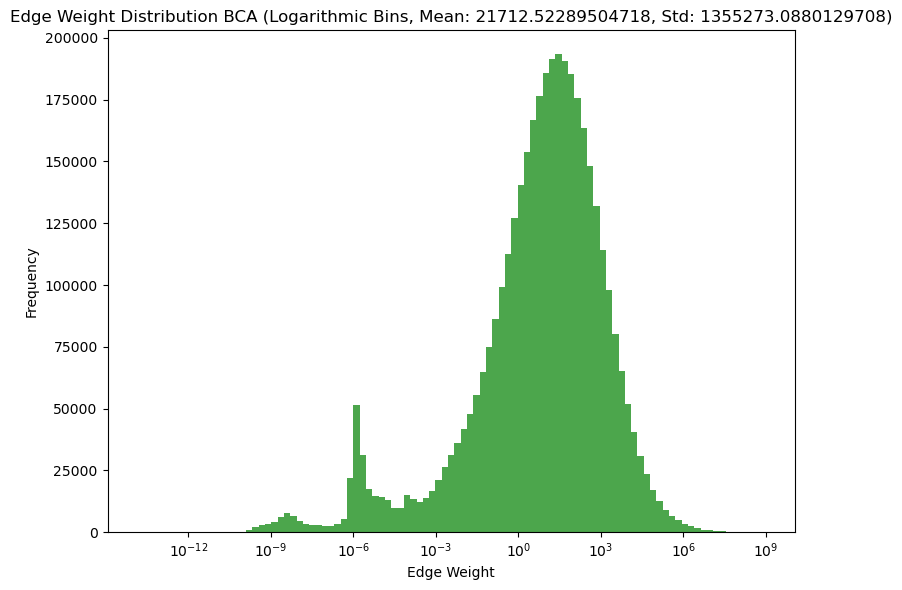

in_strength - Mean: 42925657.7635083, Standard Deviation: 141238935.2743482


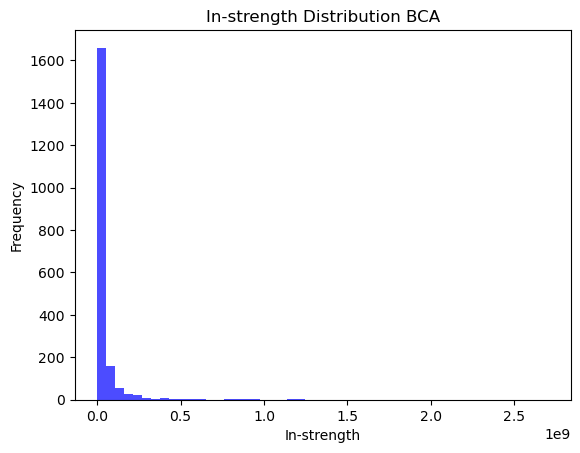

out_strength - Mean: 42925657.7635083, Standard Deviation: 145338947.88016504


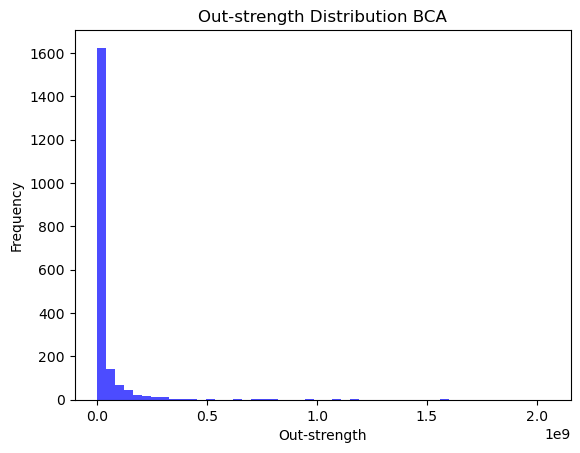

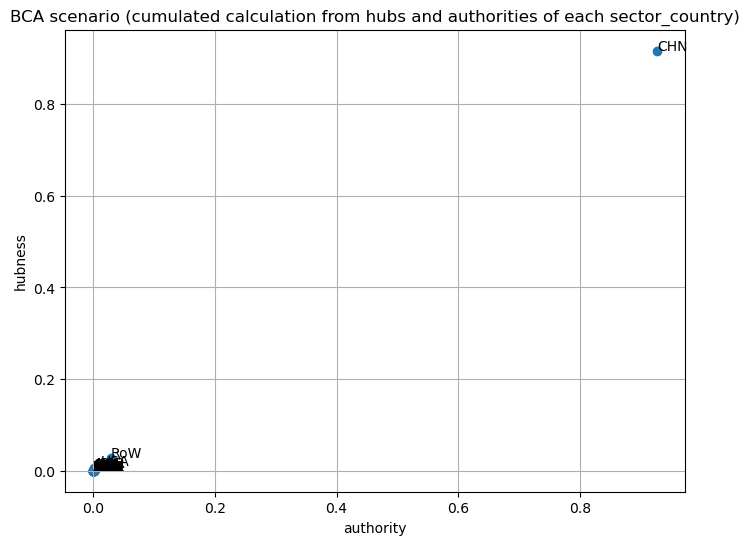

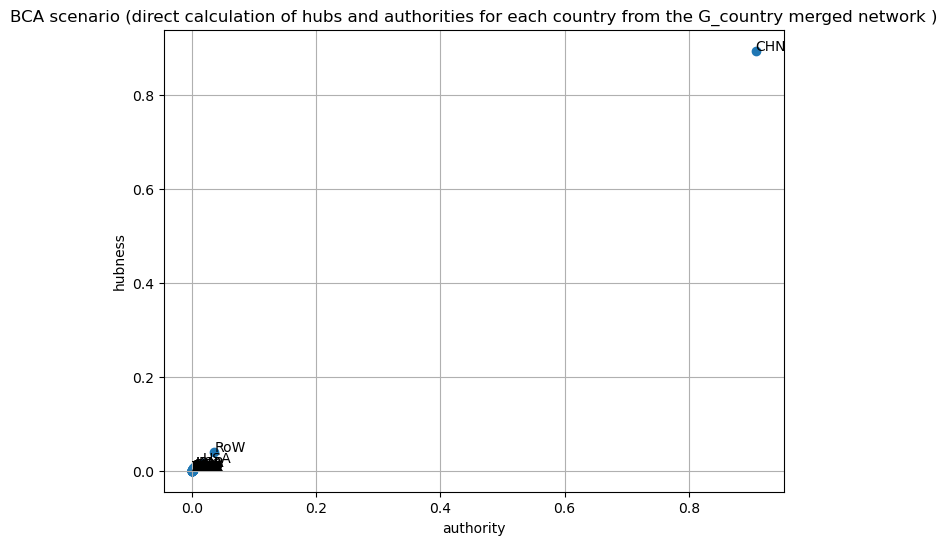

In [8]:
#centrality measures for BCA

######## Weight ########
weights = dfz_b.values.flatten() # Flatten the matrix to extract the weights
mean_weight = np.mean(weights)
std_weight = np.std(weights)
print(f"Weight - Mean: {mean_weight}, Standard Deviation: {std_weight}")
# Plot with logarithmic bins
plt.figure(figsize=(8, 6))
plt.hist(weights, bins=np.logspace(np.log10(min(weights)), np.log10(max(weights)), 100), color='g', alpha=0.7)
plt.xscale('log')
plt.title(f'Edge Weight Distribution BCA (Logarithmic Bins, Mean: {mean_weight}, Std: {std_weight})')
plt.xlabel('Edge Weight')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show() 

######## In and Out strenght ########
in_str = {node: sum(data['weight'] for _, _, data in G_b.in_edges(node, data=True)) for node in G_b.nodes}
plt.hist(in_str.values(), bins = 50, color='b', alpha=0.7)
plt.title('In-strength Distribution BCA')
plt.xlabel('In-strength') 
plt.ylabel('Frequency') 
in_str_val = list(in_str.values())
mean_in_str = np.mean(in_str_val)
std_in_str = np.std(in_str_val)
print(f"in_strength - Mean: {mean_in_str}, Standard Deviation: {std_in_str}")
plt.show()

out_str = {node: sum(data['weight'] for _, _, data in G_b.out_edges(node, data=True)) for node in G_b.nodes}
plt.hist(out_str.values(), bins = 50, color='b', alpha=0.7)
plt.title('Out-strength Distribution BCA')
plt.xlabel('Out-strength') 
plt.ylabel('Frequency') 
out_str_val = list(out_str.values())
mean_out_str = np.mean(out_str_val)
std_out_str = np.std(out_str_val)
print(f"out_strength - Mean: {mean_out_str}, Standard Deviation: {std_out_str}")

######## Hubs and authorities ########
### from G_b ###
hub_aut_b = nx.hits(G_b)
hub_b_c= cum_count(hub_aut_b[0])
aut_b_c= cum_count(hub_aut_b[1])
keys = list(hub_c.keys()) 
aut_val = [aut_b_c[key] for key in keys] #x-axis
hub_val = [hub_b_c[key] for key in keys] #y-axis

plt.figure(figsize=(8, 6))
plt.scatter(aut_val, hub_val)

for i, key in enumerate(keys): # Annotate points with their labels
    plt.annotate(key, (aut_val[i], hub_val[i]))
# Set the range for x and y axes
#plt.xlim(0.0, 0.075) 
#plt.ylim(0.0, 0.08) 

plt.xlabel('authority')
plt.ylabel('hubness')
plt.title('BCA scenario (cumulated calculation from hubs and authorities of each sector_country)')

# Display the plot
plt.grid(True)
plt.show()

### from G_c_b ###
hub_aut_b_c = nx.hits(G_b_c)
keys = list(hub_aut_c[1].keys()) 
val_aut = [hub_aut_b_c[1][key] for key in keys] #x-axis
val_hub = [hub_aut_b_c[0][key] for key in keys] #y-axis


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(val_aut, val_hub)

# Annotate points with their labels
for i, key in enumerate(keys):
    plt.annotate(key, (val_aut[i], val_hub[i]))
# Set the range for x and y axes
#plt.xlim(0.0, 0.075) 
#plt.ylim(0.0, 0.08) 

# Label axes
plt.xlabel('authority')
plt.ylabel('hubness')
plt.title('BCA scenario (direct calculation of hubs and authorities for each country from the G_country merged network )')

# Display the plot
plt.grid(True)
plt.show()

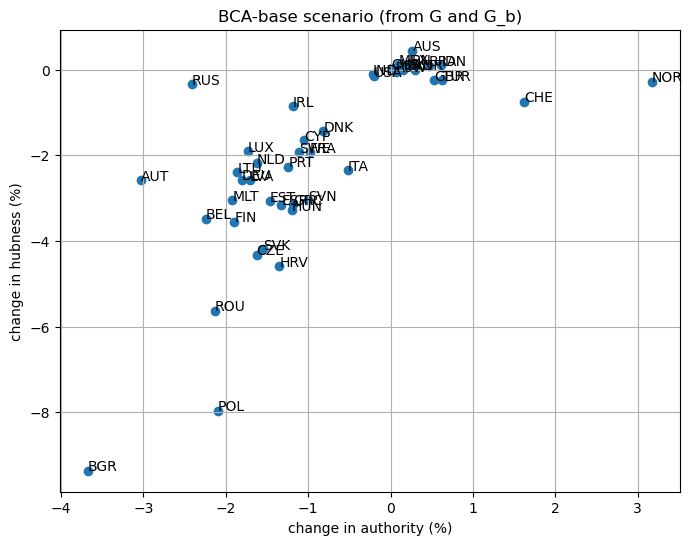

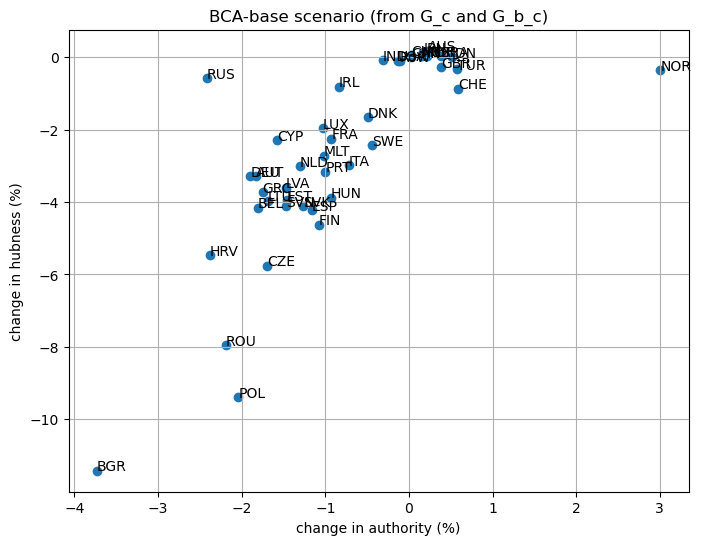

In [11]:
#compute the relative difference between hubs and authorities from G and G_b
diff_hub = {label: ((hub_b_c[label] - hub_c[label]) / hub_c[label])*100  for label in hub_c}
diff_aut = {label: ((aut_b_c[label] - aut_c[label]) / aut_c[label])*100  for label in aut_c}

# Plot
keys = list(diff_hub.keys()) 
values_author = [diff_aut[key] for key in keys] #x-axis
values_hubs = [diff_hub[key] for key in keys] #y-axis
plt.figure(figsize=(8, 6))
plt.scatter(values_author, values_hubs)

for i, key in enumerate(keys): # Annotate points with their labels
    plt.annotate(key, (values_author[i], values_hubs[i]))
    
plt.xlabel('change in authority (%)')
plt.ylabel('change in hubness (%)')
plt.title('BCA-base scenario (from G and G_b)')

plt.grid(True)
plt.show()

###############################################################################
#compute the relative difference between hubs and authorities from G_c and G_b_c
diff_hub_c = {label: ((hub_aut_b_c[0][label] - hub_aut_c[0][label]) / hub_aut_c[0][label])*100  for label in hub_aut_c[0]}
diff_aut_c = {label: ((hub_aut_b_c[1][label] - hub_aut_c[1][label]) / hub_aut_c[1][label])*100  for label in hub_aut_c[1]}

# Plot
keys = list(diff_hub_c.keys()) 
values_author = [diff_aut_c[key] for key in keys] #x-axis
values_hubs = [diff_hub_c[key] for key in keys] #y-axis
plt.figure(figsize=(8, 6))
plt.scatter(values_author, values_hubs)

for i, key in enumerate(keys): # Annotate points with their labels
    plt.annotate(key, (values_author[i], values_hubs[i]))
    
plt.xlabel('change in authority (%)')
plt.ylabel('change in hubness (%)')
plt.title('BCA-base scenario (from G_c and G_b_c)')

plt.grid(True)
plt.show()